### Decision Tree 
A Decision Tree is a supervised learning algorithm used for classification and regression.
It splits data into branches based on feature values to reach a final decision
![image-2.png](attachment:image-2.png)



### Key Components of Decision Trees in Python
- Root Node: The decision tree's starting node, which stands for the complete dataset.
- Branch Nodes: Internal nodes that represent decision points, where the data is split based on a specific attribute.
- Leaf Nodes: Final categorization or prediction-representing terminal nodes.
- Decision Rules: Rules that govern the splitting of data at each branch node.
- Attribute Selection: The process of choosing the most informative attribute for each split.
- Splitting Criteria: Metrics like information gain, entropy, or the Gini Index are used to calculate the optimal split.
### Assumptions we make while using Decision tree
- At the beginning, we consider the whole training set as the root.
- Attributes are assumed to be categorical for information gain and for gini index, attributes are assumed to be continuous.
- On the basis of attribute values records are distributed recursively.
- We use statistical methods for ordering attributes as root or internal node.


#### How Decision Trees Work

A decision tree repeatedly asks the **best question** that splits the data into the most “pure” subsets.

**Key idea:**
Choose a feature that results in the **highest Information Gain** (or lowest Gini impurity).

---

#### Important Mathematics Behind Decision Trees

####  **Entropy (Measure of impurity or randomness)**
![image-3.png](attachment:image-3.png)
Where:

* ( S ) = dataset
* ( c ) = number of classes
* ( p_i ) = proportion of class *i*

**Entropy range:**

* **0** → perfectly pure
* **1** → completely mixed (maximum uncertainty)

---

### **Information Gain (IG)**

Information Gain tells us **how much entropy is reduced** after a split.
![image-4.png](attachment:image-4.png)

Where:

* ( A ) = feature
* ( S_v ) = subset where feature = v

---

### **Gini Index (CART Algorithm)**

![image-5.png](attachment:image-5.png)

Lower Gini ⇒ better purity.

---

### Voting Dataset Example (Small Example)

Let’s use a simple dataset of 10 people:

| Person | Age    | Income | Education   | Will Vote |
| ------ | ------ | ------ | ----------- | --------- |
| 1      | Young  | High   | Graduate    | Yes       |
| 2      | Young  | Medium | Graduate    | No        |
| 3      | Middle | Low    | High School | Yes       |
| 4      | Old    | High   | Graduate    | Yes       |
| 5      | Middle | Medium | Graduate    | No        |
| 6      | Old    | Low    | High School | No        |
| 7      | Young  | Low    | High School | No        |
| 8      | Old    | Medium | Graduate    | Yes       |
| 9      | Middle | High   | Graduate    | Yes       |
| 10     | Young  | Medium | High School | No        |

**Goal:** Predict whether a new person will vote (Yes/No).

---

# Step 1: Calculate Parent Entropy

Class counts:

* Yes = 5
* No = 5

[
p(Yes)=\frac{5}{10}=0.5,\quad p(No)=0.5
]

[
H(S)= -0.5\log_2(0.5) - 0.5\log_2(0.5)=1
]

So initial entropy = **1 (maximum impurity).**

---

# Step 2: Choose Best Feature to Split

Let’s calculate **Information Gain** for the feature **Age**.

### Split on Age

---

### Young (4 samples)

* Yes = 1
* No = 3

[
H_{Young} = -\frac{1}{4}\log_2\left(\frac{1}{4}\right) - \frac{3}{4}\log_2\left(\frac{3}{4}\right) = 0.81
]

---

### Middle (3 samples)

* Yes = 2
* No = 1

[
H_{Middle} = -\frac{2}{3}\log_2\left(\frac{2}{3}\right) - \frac{1}{3}\log_2\left(\frac{1}{3}\right) = 0.92
]

---

### Old (3 samples)

* Yes = 2
* No = 1

[
H_{Old} = 0.92
]

---

### Weighted Entropy After Split

[
H_{split} =
\frac{4}{10}(0.81) + \frac{3}{10}(0.92) + \frac{3}{10}(0.92) = 0.87
]

---

### Information Gain

[
IG(Age) = 1 - 0.87 = 0.13
]

Assume **Income** gives a higher IG → it becomes the root node.

---

### Final Decision Tree (ASCII Diagram)

```
                    [Income]
                   /    |     \
                Low   Medium    High
                /       |         \
           [Vote?]   [Age]        Yes
            /   \     /  \ 
         No    Yes  Young Middle/Old
                 |      /        \
                Yes    No        Yes
```

---

### Interpretation

Decision Trees mimic human decision-making:

1. First check **Income** (the best discriminator).
2. If income is ambiguous (Medium), check **Age**.
3. Make the final classification.

---

#### Prediction Example

**Person:**

* Age = Middle
* Income = Medium
* Education = Graduate

**Tree Path:**
Income = Medium → check Age → Middle → **Vote = Yes**


In [1]:
# ============================================================
#               DECISION TREE CLASSIFICATION
#            Predicting Whether People Will Vote
# ============================================================

# -------------------------------
# 1. Import Libraries
# -------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# For cleaner plots
sns.set(style="whitegrid", palette="Set2")

# -------------------------------
# 2. Create Sample Voting Dataset
# -------------------------------
data = {
    "Age": ["Young","Young","Middle","Old","Middle","Old","Young","Old","Middle","Young"],
    "Income": ["High","Medium","Low","High","Medium","Low","Low","Medium","High","Medium"],
    "Education": ["Graduate","Graduate","High School","Graduate","Graduate",
                  "High School","High School","Graduate","Graduate","High School"],
    "Will_Vote": ["Yes","No","Yes","Yes","No","No","No","Yes","Yes","No"]
}

df = pd.DataFrame(data)
df


,Age,Income,Education,Will_Vote
0,Young,High,Graduate,Yes
1,Young,Medium,Graduate,No
2,Middle,Low,High School,Yes
3,Old,High,Graduate,Yes
4,Middle,Medium,Graduate,No
5,Old,Low,High School,No
6,Young,Low,High School,No
7,Old,Medium,Graduate,Yes
8,Middle,High,Graduate,Yes
9,Young,Medium,High School,No


### EDA

In [2]:
# Show first few rows
df.head()


,Age,Income,Education,Will_Vote
0,Young,High,Graduate,Yes
1,Young,Medium,Graduate,No
2,Middle,Low,High School,Yes
3,Old,High,Graduate,Yes
4,Middle,Medium,Graduate,No


In [3]:
# Shape of the dataset
df.shape


(10, 4)

In [ ]:
# Check for null values
df.isnull().sum()


In [4]:
# Summary of categorical variables
df.describe(include='object')


,Age,Income,Education,Will_Vote
count,10,10,10,10
unique,3,3,2,2
top,Young,Medium,Graduate,Yes
freq,4,4,6,5


### Visualizations

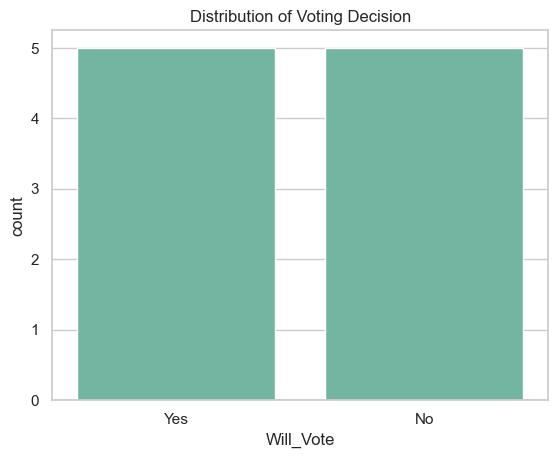

In [5]:
### Count of target variable
sns.countplot(x=df["Will_Vote"])
plt.title("Distribution of Voting Decision")
plt.show()


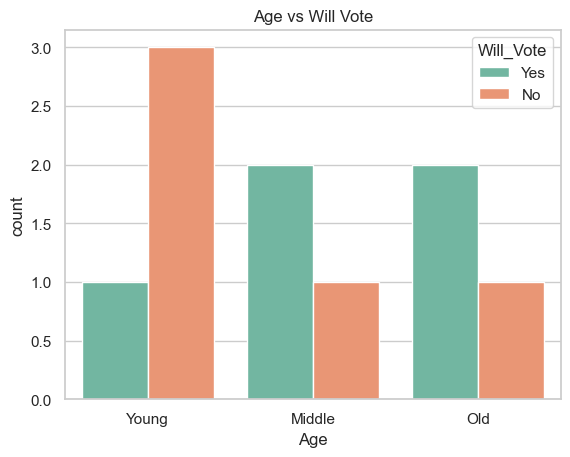

In [6]:
#Age vs Voting
sns.countplot(x="Age", hue="Will_Vote", data=df)
plt.title("Age vs Will Vote")
plt.show()


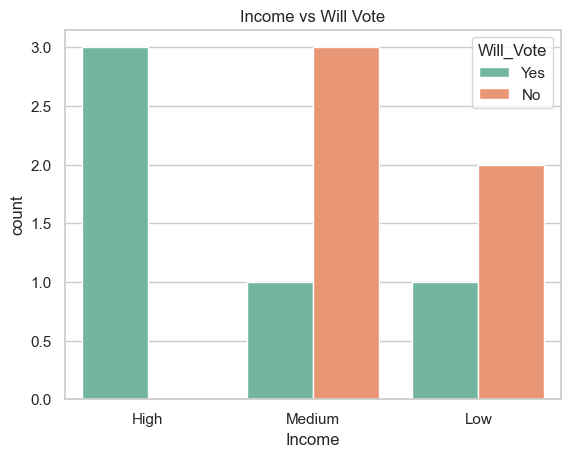

In [7]:
## Income vs voting
sns.countplot(x="Income", hue="Will_Vote", data=df)
plt.title("Income vs Will Vote")
plt.show()


### Encode Categorical Variables

- Decision Trees can work directly with labels, but encoding ensures consistency

In [8]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded


,Age,Income,Education,Will_Vote
0,2,0,0,1
1,2,2,0,0
2,0,1,1,1
3,1,0,0,1
4,0,2,0,0
5,1,1,1,0
6,2,1,1,0
7,1,2,0,1
8,0,0,0,1
9,2,2,1,0


Young-2 ,  Middle-0 , Old-1

### Mapping example:

- Yes → 1
- No → 0

**Age/Income/Education encoded by alphabetical order**

### Train/Test Split

In [9]:
X = df_encoded.drop("Will_Vote", axis=1)
y = df_encoded["Will_Vote"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


- max_depth:A parameter that controls the maximum depth of the decision tree. (number of edges from the root node to leaf node)
- Min Sample Spilt: A parameter that controlls min number of samples required to split and internal node

In [10]:
## Train Decision Tree
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [11]:
## Prediction & Accuracy
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



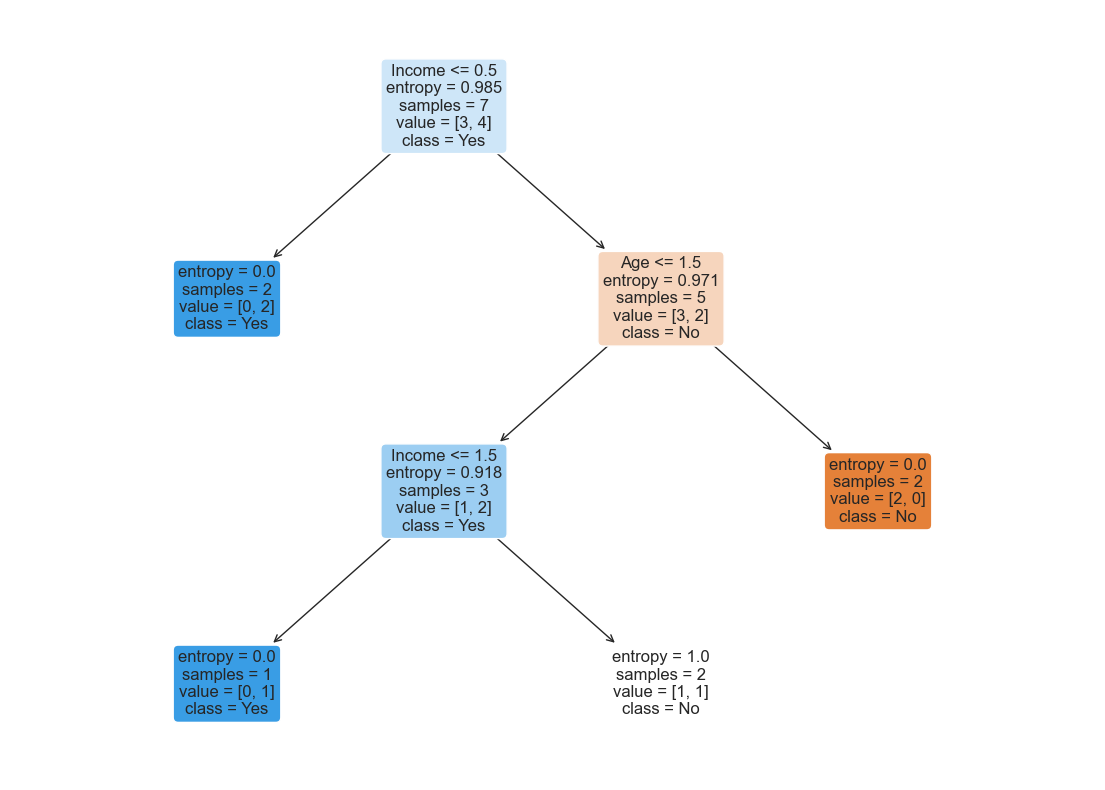

In [12]:
## Plot Decision Tree 
from sklearn.tree import plot_tree
df_encoded["Will_Vote"] = df_encoded["Will_Vote"].astype(int)

from sklearn.tree import plot_tree

plt.figure(figsize=(14, 10))

plot_tree(
    model,
    feature_names=list(X.columns),
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=12
)

plt.show()



### Manual Mathematics (Entropy + Information Gain)

In [13]:
##Parent entropy
# Calculate parent entropy
p_yes = df["Will_Vote"].value_counts()["Yes"] / len(df)
p_no = df["Will_Vote"].value_counts()["No"] / len(df)

parent_entropy = -(p_yes*np.log2(p_yes) + p_no*np.log2(p_no))
parent_entropy


1.0

### Entropy After Splitting on "Income"

In [14]:
def entropy(subset):
    values = subset.value_counts()
    total = len(subset)
    return -sum((count/total)*np.log2(count/total) for count in values)

for income_group, subset in df.groupby("Income"):
    ent = entropy(subset["Will_Vote"])
    print(f"Entropy for Income = {income_group}: {ent:.3f}")


Entropy for Income = High: -0.000
Entropy for Income = Low: 0.918
Entropy for Income = Medium: 0.811


### Predict a New Person
Example:
- Age = Middle
- Income = Medium
- Education = Graduate

In [15]:
# ---- Fit and store LabelEncoders ----
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
df_encoded = df.copy()

for col in df.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ---- Train model ----
X = df_encoded.drop("Will_Vote", axis=1)
y = df_encoded["Will_Vote"]

model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X, y)

# ---- Predict new person ----
new_person = pd.DataFrame({
    "Age": ["Middle"],
    "Income": ["Medium"],
    "Education": ["Graduate"]
})

new_encoded = new_person.copy()

for col in new_encoded.columns:
    le = label_encoders[col]
    new_encoded[col] = le.transform(new_encoded[col])

prediction = model.predict(new_encoded)
prediction


array([0])

In [16]:
diagram = """
                    [Income]
                   /    |     \\
                Low   Medium    High
                /       |         \\
             No       [Age]       Yes
                      /   \\
                   Young  Middle/Old
                     |       \\
                    No       Yes
"""
print(diagram)



                    [Income]
                   /    |     \
                Low   Medium    High
                /       |         \
             No       [Age]       Yes
                      /   \
                   Young  Middle/Old
                     |       \
                    No       Yes



# ============================
#       LAB ASSIGNMENTS
# ============================

1. Calculate the entropy of the "Age" feature manually.
2. Compute Information Gain for "Age", "Income", and "Education".
3. Try training the model using criterion="gini". Compare results.
4. Change `max_depth` from 3 to 5 and observe:
   - Does accuracy increase?
   - Does the tree overfit?
5. Visualize the tree again after tuning hyperparameters.
6. Add 10 more synthetic rows to increase dataset size.
7. Try predicting voting behaviour for:
   - Age = Young, Income = High, Education = High School
   - Age = Old, Income = Low, Education = Graduate
8. Export the trained model using joblib.
